<a href="https://colab.research.google.com/github/ThoughtRobot/Project/blob/master/Major_Project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
#imported necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import WordCloud,STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
#reading csv file
data=pd.read_csv('/content/drive/My Drive/SmartKnower/ML/Reviews.csv')
df=pd.DataFrame(data)
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [72]:
#Removed all rows with score 3 and converted...
#...score [1,2] to negative and [4,5] to positive 
filt_data=df.dropna(how='all')
filt_data.drop(df[df['Score']==3].index, inplace=True)

def partition(x):
    if x < 3:
        return 'negative'
    return 'positive'

actual_score = filt_data['Score']
posneg = actual_score.map(partition)
filt_data['Score'] = posneg
filt_data.head(15)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,negative,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,positive,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,positive,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,positive,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,positive,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,positive,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [73]:
#Droppong the unnecessary columns
cols_to_drop=['Id','ProductId','UserId','ProfileName','Time','HelpfulnessNumerator','HelpfulnessDenominator','Summary']
filt_data.drop(cols_to_drop, axis=1, inplace=True)
filt_data.head()

,Score,Text
0,positive,I have bought several of the Vitality canned d...
1,negative,Product arrived labeled as Jumbo Salted Peanut...
2,positive,This is a confection that has been around a fe...
3,negative,If you are looking for the secret ingredient i...
4,positive,Great taffy at a great price. There was a wid...


In [74]:
filt_data.isnull().sum()

Score    0
Text     0
dtype: int64

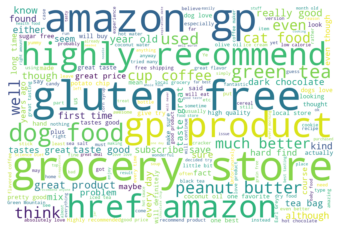

In [75]:
#generating wordcloud
wc = filt_data['Text']
text=' '.join(st for st in wc)
text=text.replace('br','')
wordcloud = WordCloud(width=1200,height=800,background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [76]:
filt_data

,Score,Text
0,positive,I have bought several of the Vitality canned d...
1,negative,Product arrived labeled as Jumbo Salted Peanut...
2,positive,This is a confection that has been around a fe...
3,negative,If you are looking for the secret ingredient i...
4,positive,Great taffy at a great price. There was a wid...
...,...,...
568449,positive,Great for sesame chicken..this is a good if no...
568450,negative,I'm disappointed with the flavor. The chocolat...
568451,positive,"These stars are small, so you can give 10-15 o..."
568452,positive,These are the BEST treats for training and rew...


In [77]:
X = filt_data.iloc[:,1].values
y = filt_data.iloc[:,0].values

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.95)

In [79]:
pipeline = Pipeline([
                     ('bow',CountVectorizer()),
                     ('tfidf',TfidfTransformer()),
                    ('classifier',LogisticRegression(max_iter=100000))
])

In [80]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling

In [81]:
predictions = pipeline.predict(X_test)

In [82]:
print(accuracy_score(y_test,predictions)*100)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

93.87623140998821
              precision    recall  f1-score   support

    negative       0.87      0.72      0.79      4163
    positive       0.95      0.98      0.96     22128

    accuracy                           0.94     26291
   macro avg       0.91      0.85      0.88     26291
weighted avg       0.94      0.94      0.94     26291

[[ 3000  1163]
 [  447 21681]]


In [83]:
pipeline.predict(["Tastes very odd. It comes in a plastic pet jar."])

array(['negative'], dtype=object)